In [2]:
# Click into this cell and press shift-enter before using this notebook.
# This line loads the ability to use %%ai in your file
%load_ext jupyter_ai_magics
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


# Code examples to help with lab03

Note that the data file used in the examples in *this* file is the same data file
we used in lab02; that's where you can find the actual data file.

This is a different data file from the one you are using in lab03 (which is a data file
about fatal traffic accidents in the city of Los Angeles.)

In [3]:
ranking = Table.read_table("../lab02/data/world_university_rankings.csv")

In [5]:
ranking

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
5,Peking University,China,90.4,74.5,95.4,94,91.8,96.3
6,Tsinghua University,China,89.6,82.5,99.5,77.7,95.2,93.2
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
8,ETH Zurich,Switzerland,88.3,87.1,99.5,96.4,83.1,75.2
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
10,National University of Singapore,Singapore,86.8,79.7,97.9,80.4,95.9,79.9


### `are.contained_in` and `are.containing`

In [6]:
# lists everything that has "United" in it
ranking.where("location", are.containing("United"))

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
11,Duke University,United States,85.7,80.2,100,83,87.5,77.7
12,The University of Chicago,United States,85.6,95.8,67.6,79,93.5,91.9
13,London School of Economics and Political Science,United Kingdom,85.2,81.9,68.1,95.7,94.5,85.9
14,Yale University,United States,85,86.9,67.8,85.1,89.3,96.1


In [7]:
ivies = ["Harvard University", "Yale University", "Columbia University"]

In [8]:
# lists everything that's in ivies
ranking.where("ranking-institution-title", are.contained_in(ivies))

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
14,Yale University,United States,85,86.9,67.8,85.1,89.3,96.1
15,Columbia University,United States,84.8,79.2,77.3,87.7,87.8,92


### `tbl.group(column_or_columns, func)`

`func` is how you want to aggregate values

In [9]:
teaching = ranking.select("location", "Teaching Score")
teaching

location,Teaching Score
United States,96
United States,98.2
United Kingdom,93.5
United States,91.1
China,96.3
China,93.2
United Kingdom,93.8
Switzerland,75.2
United States,95
Singapore,79.9


In [10]:
# group gives counts by default
teaching.group("location")

location,count
Australia,34
Austria,5
Bangladesh,2
Belgium,8
Brazil,23
Brunei Darussalam,1
Canada,28
Chile,3
China,60
Colombia,5


In [11]:
# it can do other things, like get the max of all scores for a single location
teaching.group("location", max)

location,Teaching Score max
Australia,59.2
Austria,41.6
Bangladesh,15.6
Belgium,45.7
Brazil,53.7
Brunei Darussalam,22.6
Canada,67.2
Chile,20.4
China,96.3
Colombia,22.1


In [12]:
teaching.group("location", min)

location,Teaching Score min
Australia,13.4
Austria,19.9
Bangladesh,10.5
Belgium,15.1
Brazil,11.8
Brunei Darussalam,22.6
Canada,8.6
Chile,13.4
China,9.4
Colombia,11.8


Let's verify the min max result!

In [13]:
# here are the teaching scores for the 5 Austrian universities
teaching.where("location", "Austria")

location,Teaching Score
Austria,41.6
Austria,26.1
Austria,25.4
Austria,19.9
Austria,25.1


In [13]:
min(41.6, 26.1, 25.4, 19.9, 25.1)

19.9

In [14]:
max(41.6, 26.1, 25.4, 19.9, 25.1)

41.6

In [ ]:
# This will work for any function!!!

### `tbl.barh(categories, values)`
#### Bar chart, good for labels that have numerical values

In [14]:
ireland = ranking.where("location", "Ireland")
ireland

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
86,Trinity College Dublin,Ireland,64.4,90,67.2,88.3,37.8,38.8
147,University College Dublin,Ireland,58.4,82.2,63.4,84.9,32.5,28.9
250,Dublin City University,Ireland,52.7,93.6,55.8,73.2,22.9,18.2
290,University of Galway,Ireland,50.6,78.8,67.5,65.4,19.5,21.7
329,Maynooth University,Ireland,48.7,69.7,72.2,70,18.2,13.3
424,University of Limerick,Ireland,44.7,58.7,68.1,56.9,20.7,19.3
594,University College Cork,Ireland,37.4,53.2,40.3,53.8,17.7,22.1
626,Technological University Dublin,Ireland,35.9,33.8,68,54.4,8.4,14.8


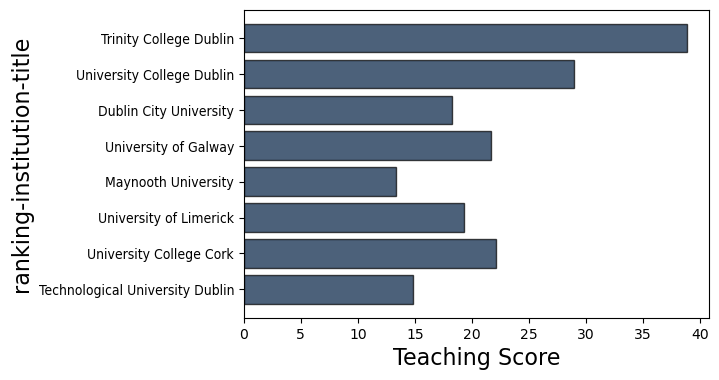

In [15]:
# plot ranking-institution-title on the y-axis and teaching score on the x-axis
ireland.barh("ranking-institution-title", "Teaching Score")

### `tbl.scatter(x_column, y_column)`
#### Good for two columns of numerical data

In [16]:
two_cols = ranking.select("rank", "Teaching Score")

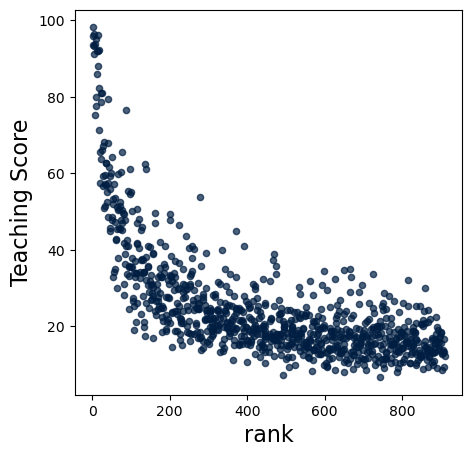

In [18]:
# rank on x-axis, teaching score on y-axis
two_cols.scatter("rank", "Teaching Score") 

# Not needed for lab03, but still good to know about

The methods below are not used in lab03, but we may need them in the future, so they are good to know about!


### `tbl.hist(column, bins)`
#### Good for one column of numerical data
- `column`: string \
    name of the column with categories
- `bins`: (Optional) list or int\
    Lower bound for each bin in the histogram or number of bins. If None, bins will be chosen automatically.

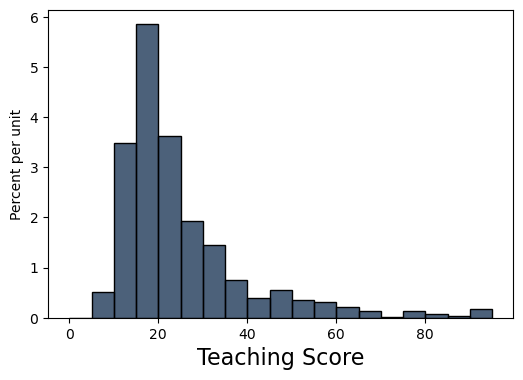

In [19]:
ranking.hist("Teaching Score", bins=np.arange(0, 100, 5)) # bins from 0-100, every 5

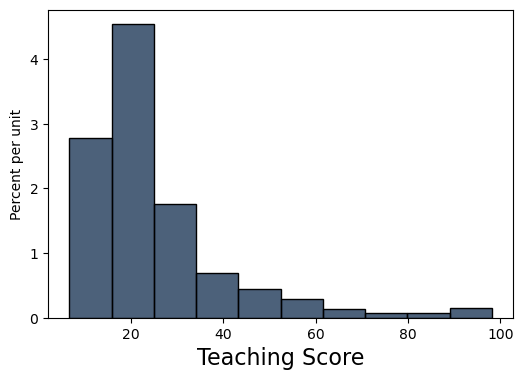

In [20]:
ranking.hist("Teaching Score", bins=10) # 10 bins over the range of the data